<a href="https://colab.research.google.com/github/mohamedelziat50/Hotel-Bookings-AI-MIU/blob/main/Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Reading the dataset
df = pd.read_csv('/content/hotel_bookings.csv')

In [ ]:
#sample of first and last parts of the dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city
0,Resort Hotel - Chandigarh,0,342,2024,July,30,27,0,0,2,...,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,16:40.9,Chandigarh
1,Resort Hotel - Mumbai,0,737,2024,April,17,28,0,0,2,...,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,56:21.5,Mumbai
2,Resort Hotel - Delhi,0,7,2024,September,37,10,0,1,1,...,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,46:25.7,Delhi
3,Resort Hotel - Kolkata,0,13,2024,August,33,14,0,1,1,...,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,07:10.1,Kolkata
4,Resort Hotel - Lucknow,0,14,2024,September,37,14,0,2,2,...,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,27:32.5,Lucknow


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city
6787,Resort Hotel - Goa,1,179,2024,July,27,1,2,5,2,...,240.0,NaN,0.0,Transient,81.00,0.0,1.0,Canceled,55:10.0,Goa
6788,Resort Hotel - Chandigarh,0,273,2024,August,34,25,2,5,2,...,314.0,NaN,0.0,Transient-Party,74.00,0.0,0.0,Check-Out,51:05.0,Chandigarh
6789,Resort Hotel - Bhopal,1,179,2024,September,39,25,2,5,1,...,240.0,NaN,0.0,Transient,72.90,0.0,1.0,Canceled,51:34.7,Bhopal
6790,Resort Hotel - Kochi,1,170,2024,May,20,17,2,1,2,...,241.0,NaN,0.0,Transient,103.76,0.0,3.0,Canceled,38:45.8,Kochi
6791,Resort Hotel - Pune,1,171,2024,February,6,5,2,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape
#Therfore, the dataset has:
# 119390 rows (records)
# 33 coloumns (features) - including target feature

(6792, 33)

In [ ]:
# Table representing nulls (feature-> corresponding records with nulls)
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


Table shows the features with nulls are:
*   children (4)
*   country (488)
*   agent (16340)
*   company (112593)

In [ ]:
#Dividing the number of nulls over total to get the percentage
# in ordr to set threshold for null values ( if above handle nulls)
(df.isnull().sum()/df.shape[0])*100

,0
hotel,0.000000
is_canceled,0.000000
lead_time,0.000000
arrival_date_year,0.000000
arrival_date_month,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.000000
stays_in_week_nights,0.000000
adults,0.000000


Because company has threshold more than 50 % (94.3) we should delete (drop) whole coloumn

In [ ]:
df = df.drop('company', axis=1)

In [ ]:
# Count the number of unique values in each column
# to check not all unique and not all are same (unuseful)
unique_counts = df.nunique()
print(unique_counts)

hotel                               15
is_canceled                          2
lead_time                          339
arrival_date_year                    1
arrival_date_month                  12
arrival_date_week_number            52
arrival_date_day_of_month           31
stays_in_weekend_nights             12
stays_in_week_nights                23
adults                              14
children                             5
babies                               3
meal                                 5
country                             61
market_segment                       6
distribution_channel                 3
is_repeated_guest                    1
previous_cancellations               1
previous_bookings_not_canceled       1
reserved_room_type                   9
assigned_room_type                  10
booking_changes                      8
deposit_type                         4
agent                               94
days_in_waiting_list                 6
customer_type            

Because the coloumn "Arrival date year" has only 1 unique value , so no pattern can ve detected from it , **so we will have to drop it as its not necessary.**

In [ ]:
df = df.drop('arrival_date_year', axis=1)

In [ ]:
df.duplicated().sum()

np.int64(0)

np.int64(0) indicates that no duplicate values , so no duplicates to be removed

In [ ]:
#identifying garbage values
for i in df.select_dtypes(include = "object").columns:
  print(df[i].value_counts())
  print("****"*10)


hotel
Resort Hotel - Bangalore     508
Resort Hotel - Chennai       484
Resort Hotel - Chandigarh    474
Resort Hotel - Bhopal        472
Resort Hotel - Delhi         467
Resort Hotel - Hyderabad     462
Resort Hotel - Kochi         456
Resort Hotel - Mumbai        451
Resort Hotel - Jaipur        451
Resort Hotel - Ahmedabad     450
Resort Hotel - Indore        446
Resort Hotel - Lucknow       429
Resort Hotel - Pune          427
Resort Hotel - Goa           408
Resort Hotel - Kolkata       407
Name: count, dtype: int64
****************************************
arrival_date_month
January      618
October      594
June         586
July         584
September    571
May          571
March        566
November     560
February     550
August       550
December     535
April        507
Name: count, dtype: int64
****************************************
meal
BB           4595
HB           1540
FB            367
Undefined     272
SC             18
Name: count, dtype: int64
*********************

Because here the fields "market_segment" has 2 'undefined', and "distribution_channel" has 5 'undefined', **so we have to replace it with null.**

In [ ]:
# Replace 'undefined' with NaN in a specific columns  'market_segment' and 'distribution_channel'
df['market_segment'] = df['market_segment'].replace('Undefined', np.nan)
df['distribution_channel'] = df['distribution_channel'].replace('Undefined', np.nan)

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,6792.000000,6792.000000,6792.000000,6792.000000,6792.000000,6792.000000,6792.000000,6792.000000,6792.000000,6792.0,6792.0,6792.0,6792.000000,5672.000000,6791.000000,6791.000000,6791.000000,6791.000000
mean,0.517815,96.119552,26.319935,15.706419,1.235718,3.309040,1.949058,0.111602,0.013693,0.0,0.0,0.0,0.218640,214.053597,1.514504,85.658566,0.074952,0.543661
std,0.499719,78.791020,15.100058,8.817682,1.153996,2.452023,1.358469,0.435064,0.118727,0.0,0.0,0.0,0.614975,80.986718,12.281662,46.260806,0.265006,0.797160
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,34.000000,13.000000,8.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,196.000000,0.000000,54.400000,0.000000,0.000000
50%,1.000000,78.000000,26.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,240.000000,0.000000,74.400000,0.000000,0.000000
75%,1.000000,148.000000,39.000000,23.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,243.000000,0.000000,110.000000,0.000000,1.000000
max,1.000000,737.000000,52.000000,31.000000,13.000000,33.000000,55.000000,10.000000,2.000000,0.0,0.0,0.0,17.000000,405.000000,122.000000,332.000000,2.000000,4.000000


we identified the coloumns that have outliers where its because either (differnce between 75% and max ) or (difference between the mean and median (50%) ) is SIGNIFICANT

Features with outliers:

*   Lead_time
*   stays_in_weekend_nights
*   stays_in_week_nights
*   adults
*   children
*   babies
*   previous_cancellations
*   previous_bookings_not_canceled
*   booking_changes
*   agent (not sure)
*   days_in_waiting_list
*   adr

In [ ]:
df.describe(include = "object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,city
count,6792,6792,6792,6790,6792,6792,6792,6792,6792,6791,6791,6791,6791
unique,15,12,5,61,6,3,9,10,4,4,3,6146,15
top,Resort Hotel - Bangalore,January,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Canceled,14:39.3,Bangalore
freq,508,618,4595,4293,2816,5152,4373,3607,5975,4856,3402,4,508


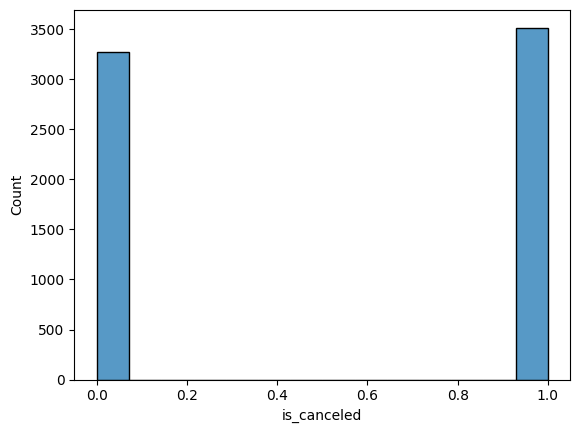

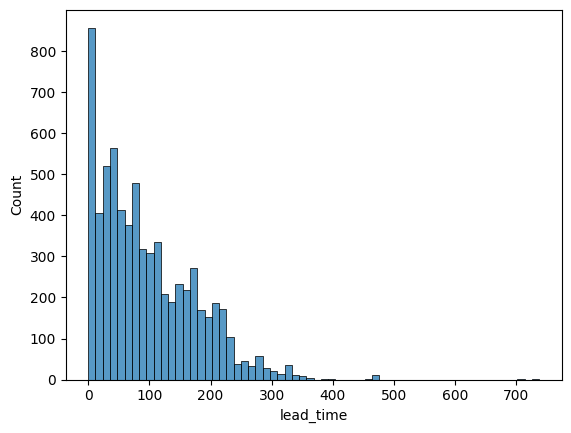

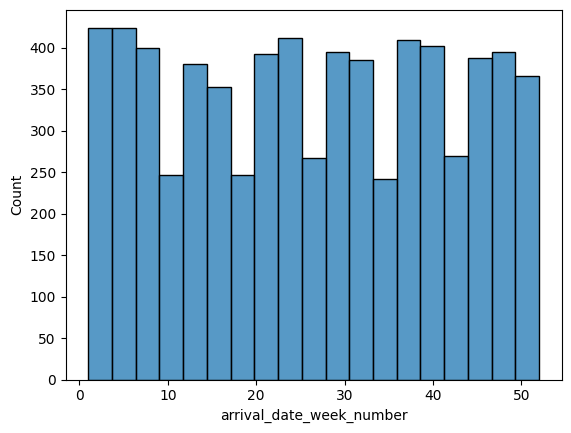

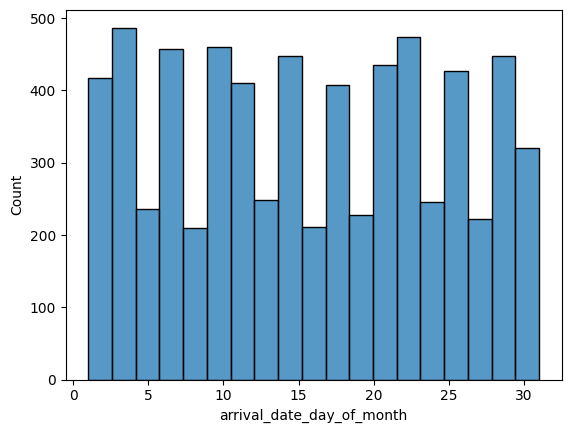

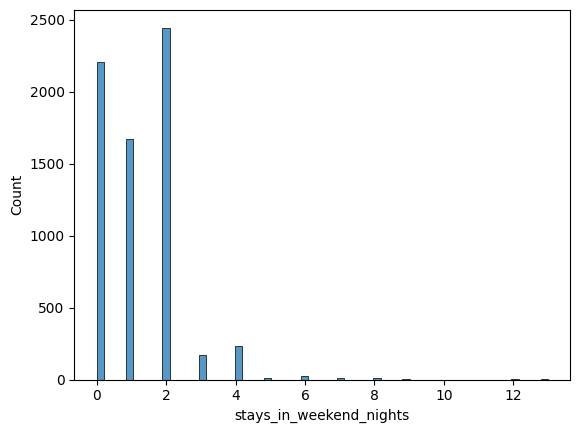

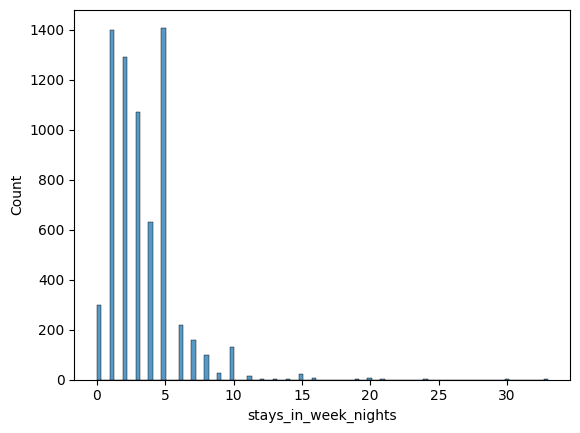

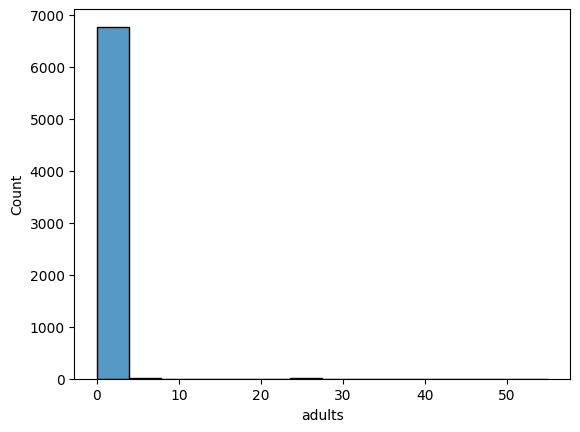

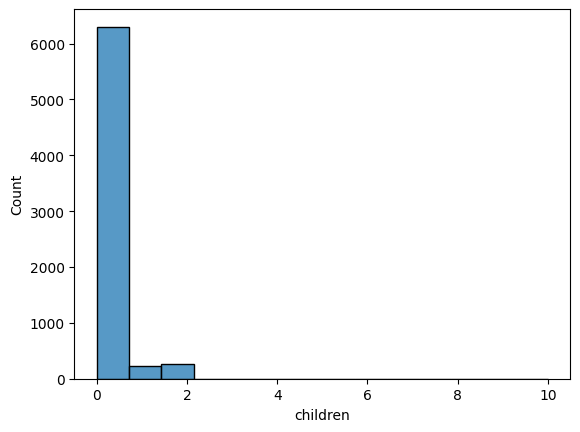

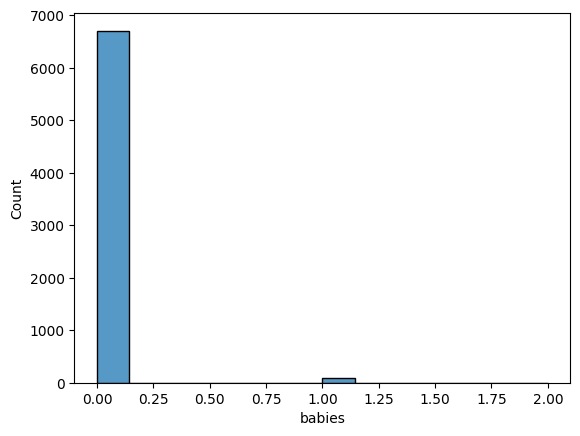

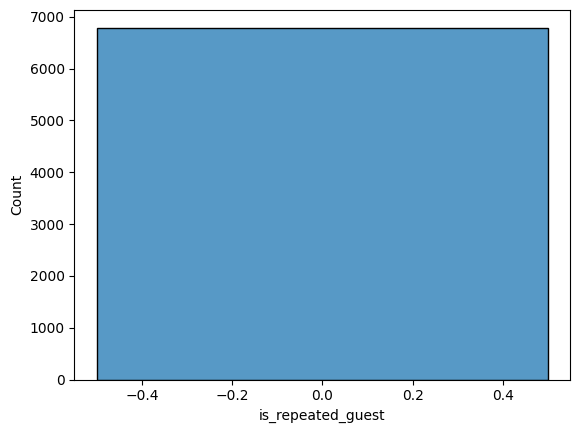

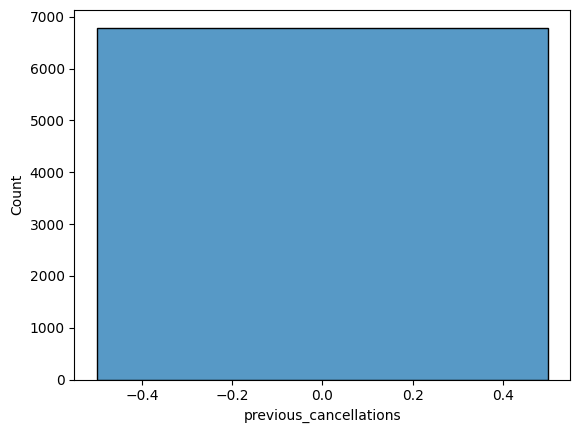

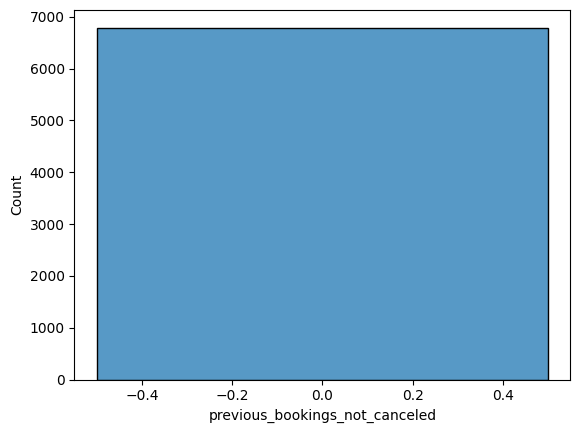

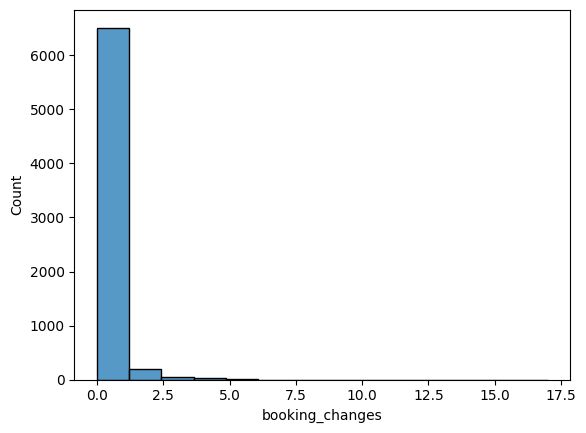

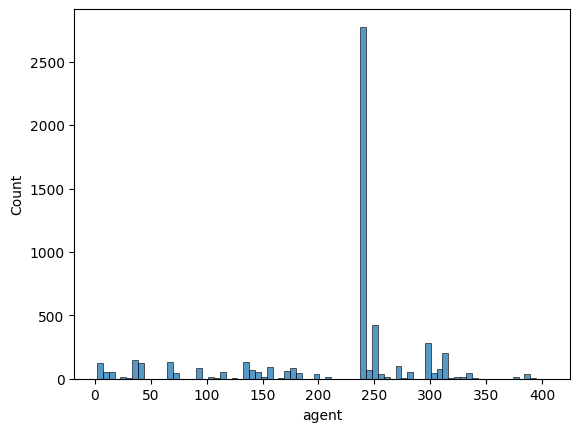

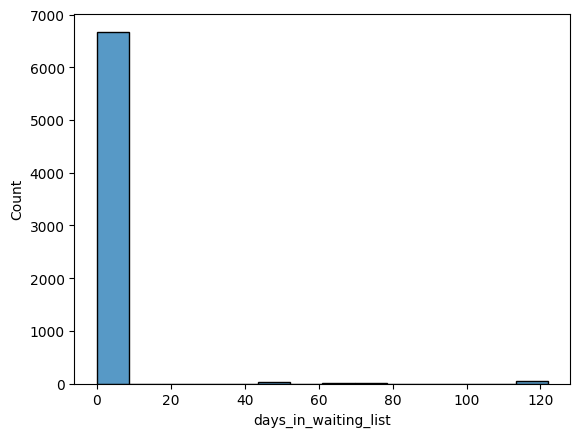

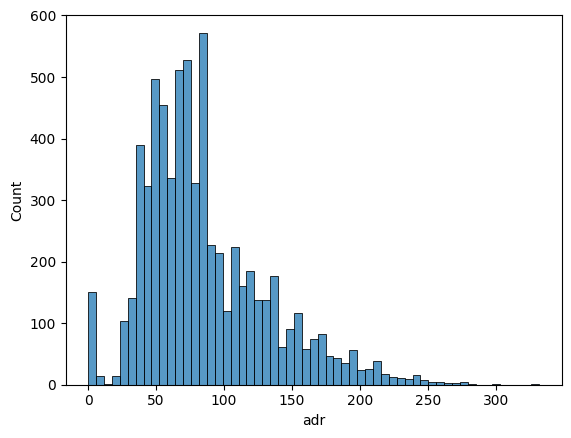

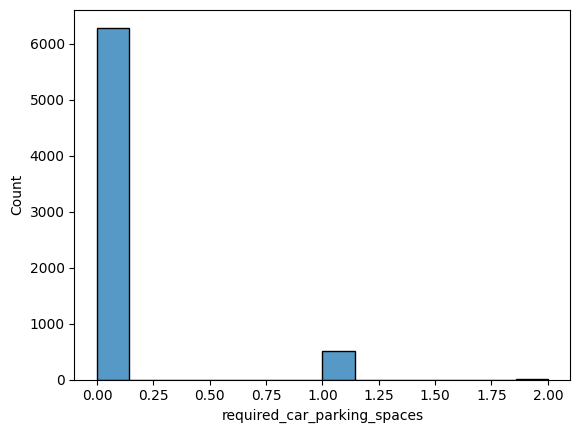

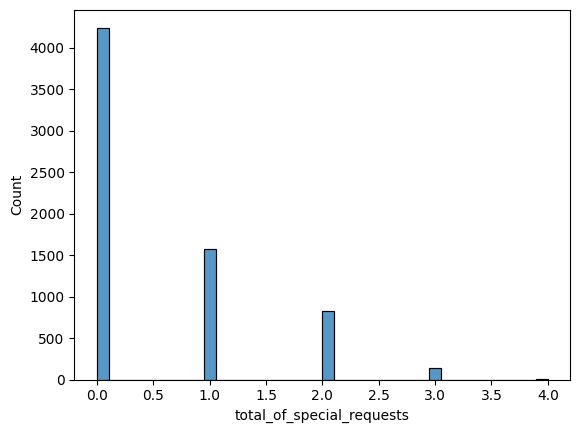

In [ ]:

for i in df.select_dtypes(include= "number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

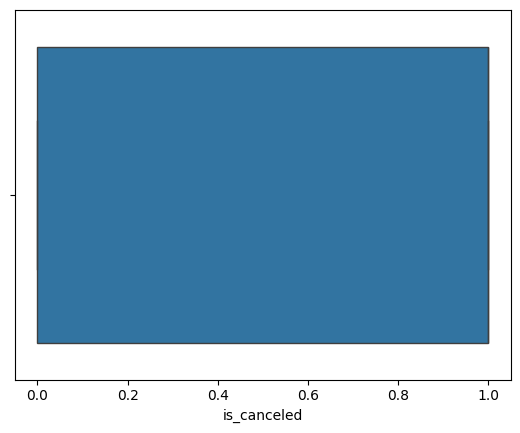

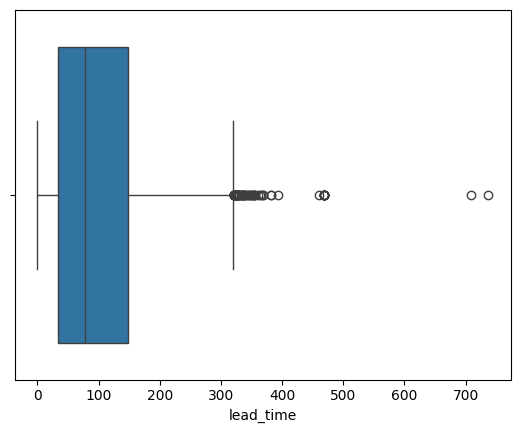

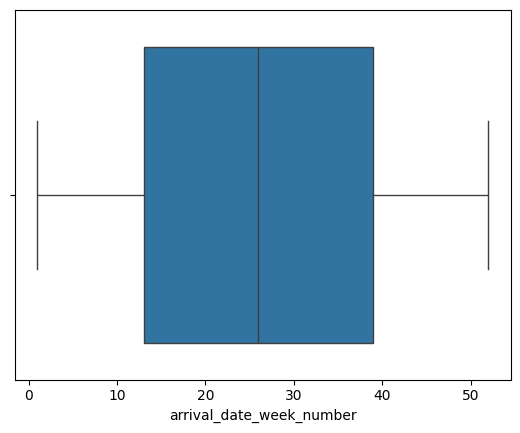

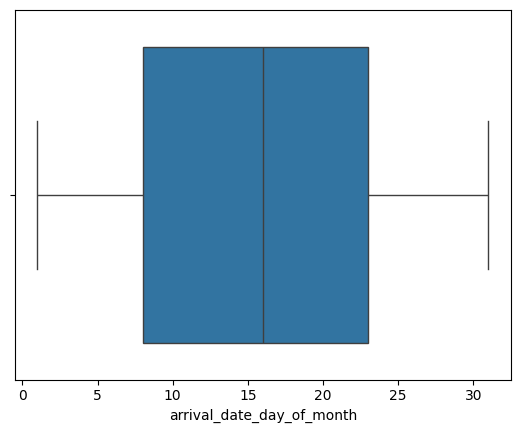

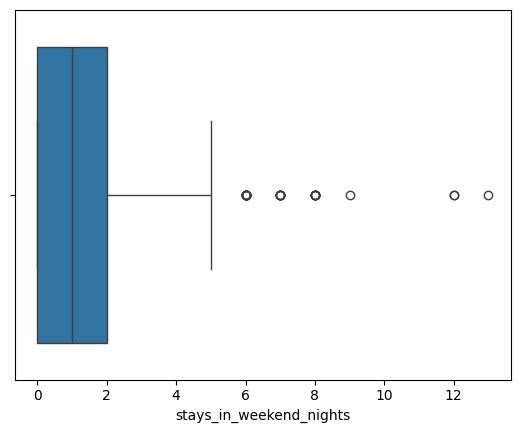

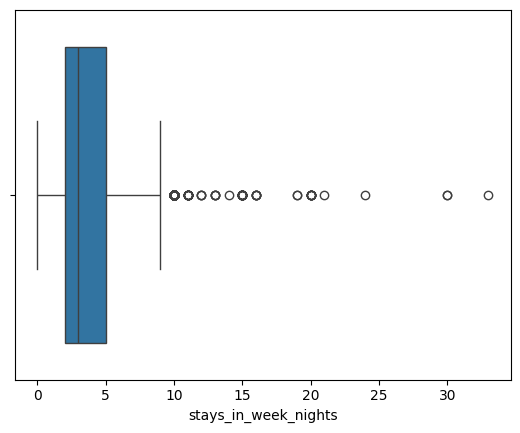

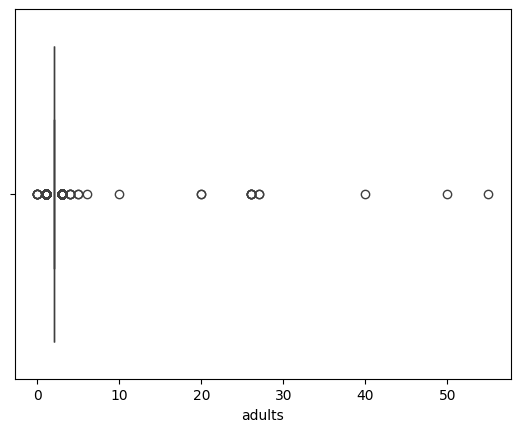

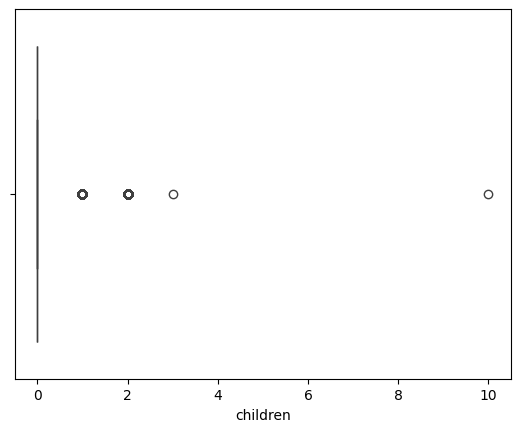

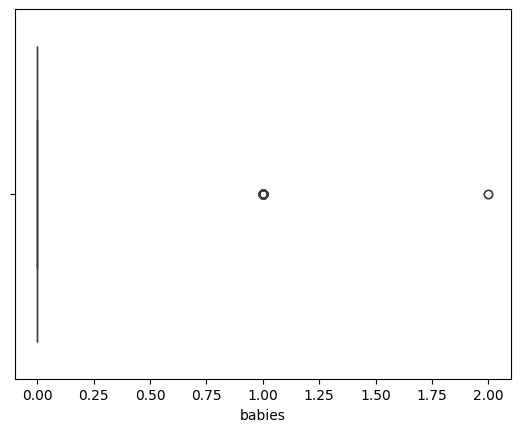

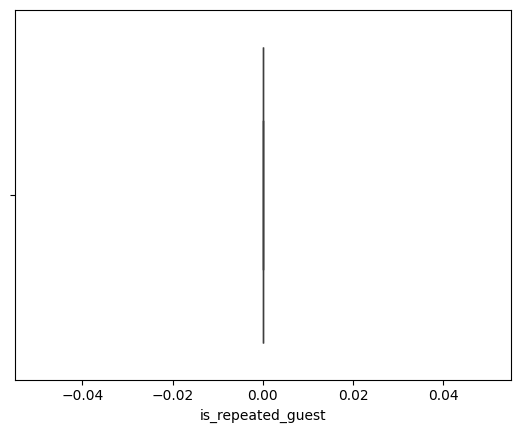

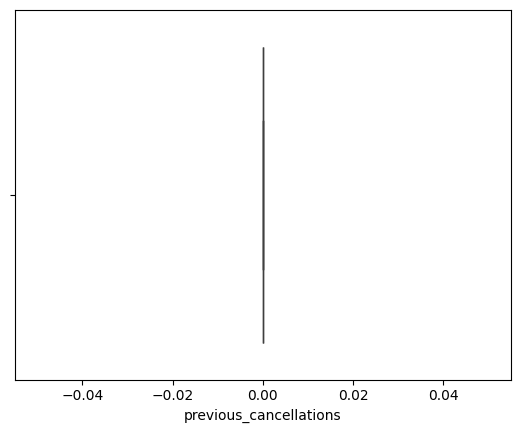

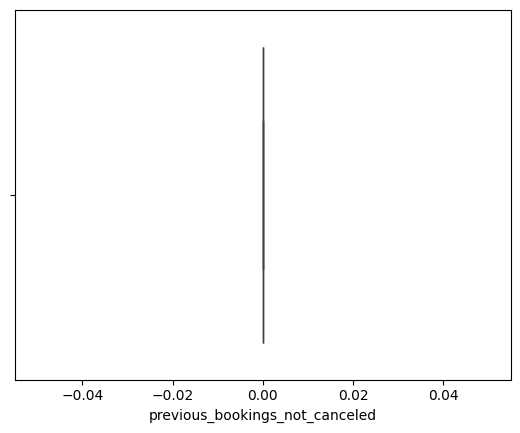

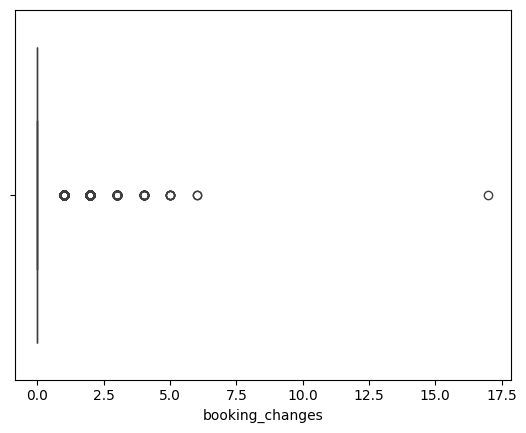

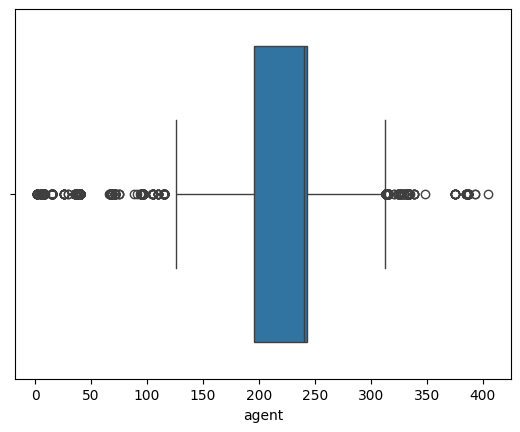

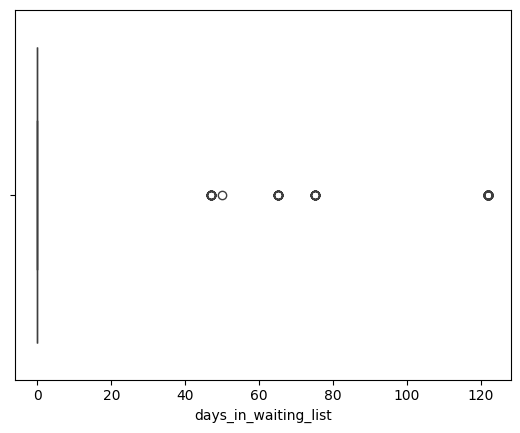

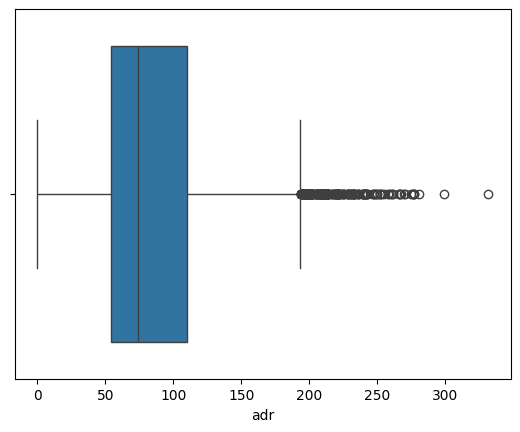

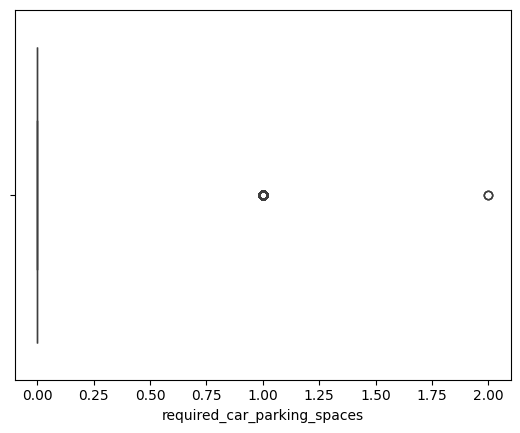

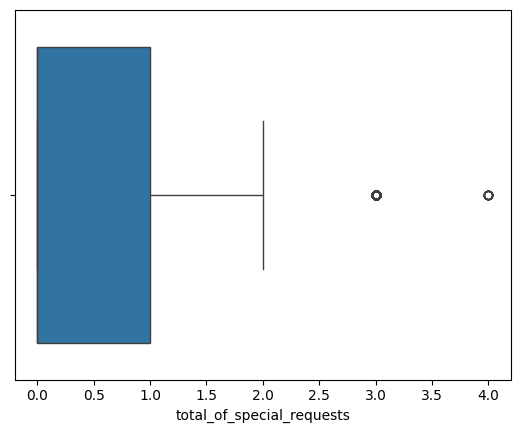

In [ ]:
for i in df.select_dtypes(include= "number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [ ]:
#scatter plot to understand the relationship (positive or negative)
#remove the target coloumn
numeric_columns = df.select_dtypes(include = "number").columns.drop('is_canceled')
print(numeric_columns)
print(df.shape)

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')
(6792, 31)


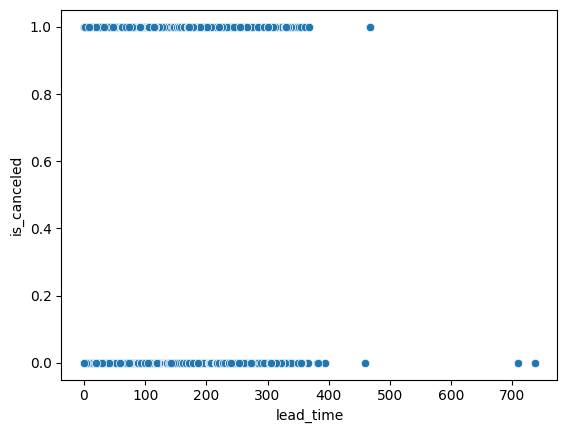

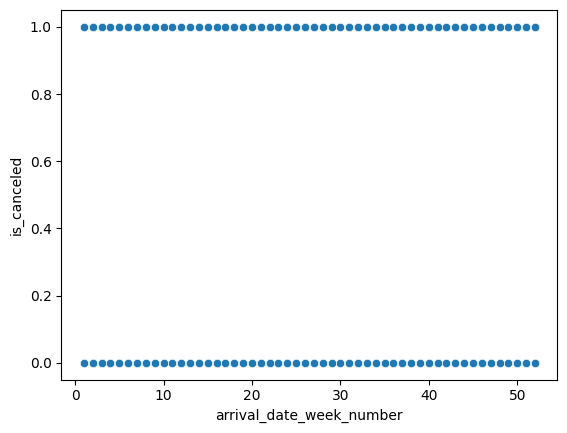

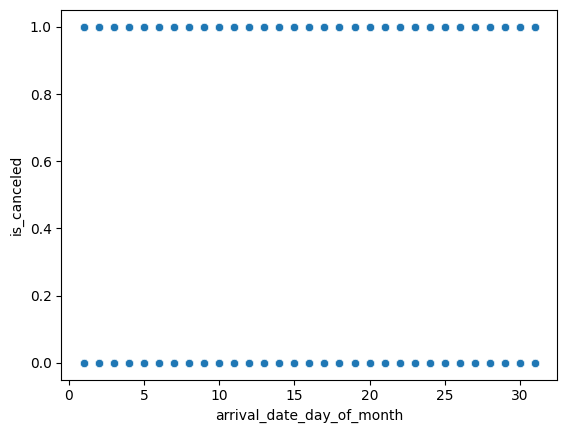

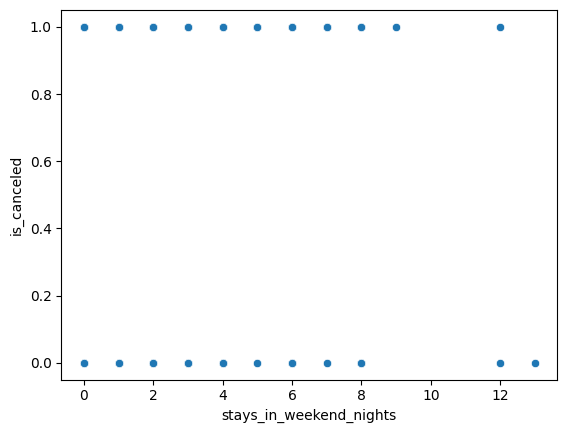

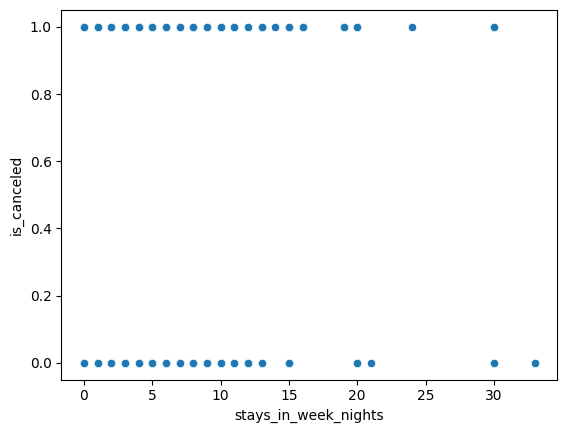

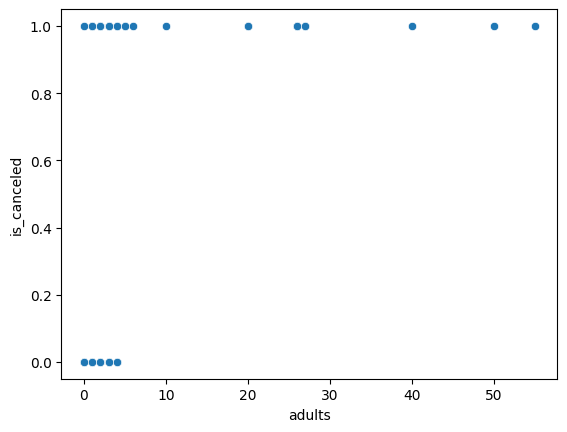

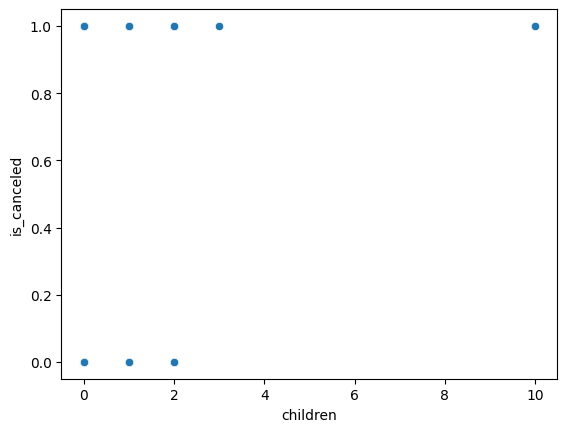

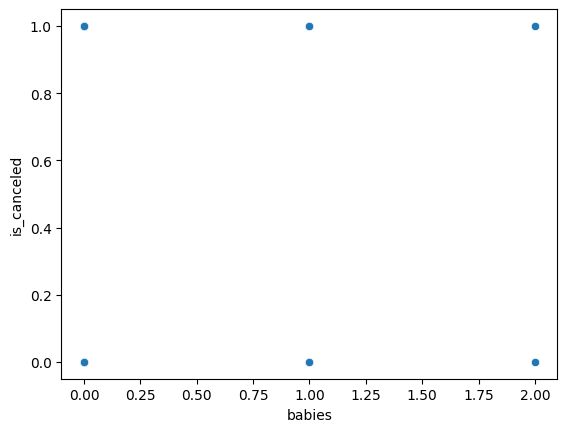

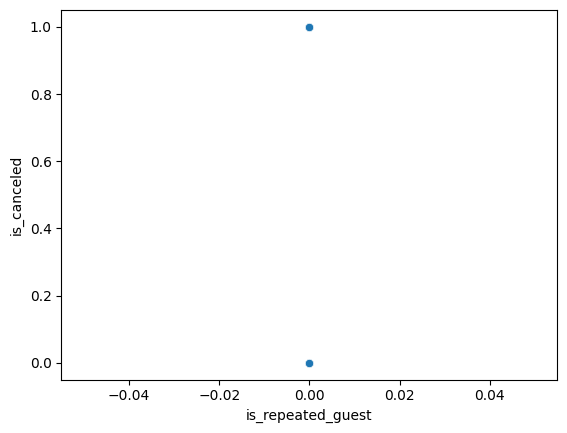

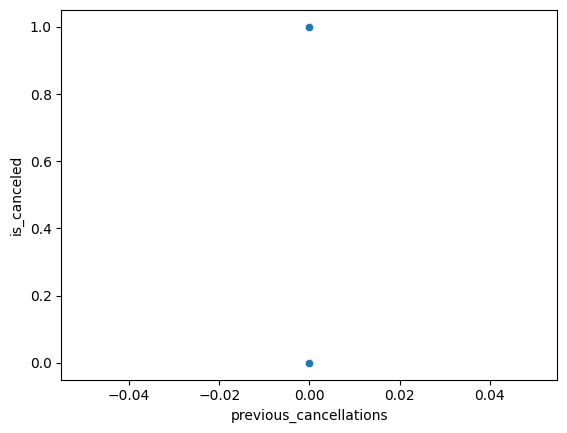

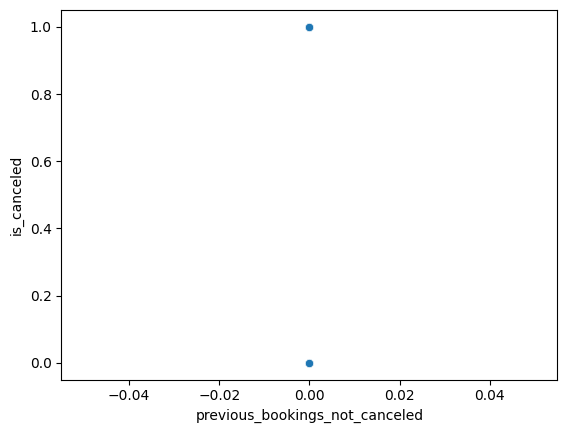

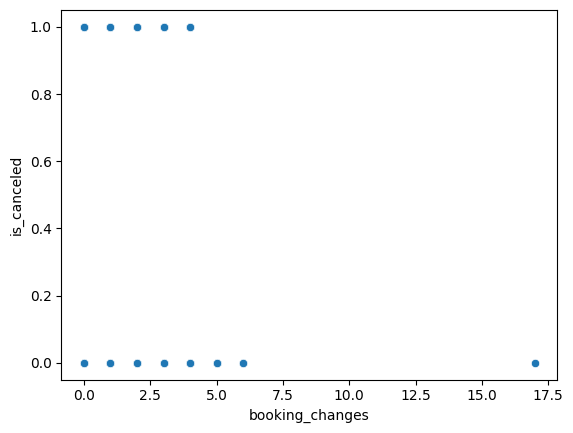

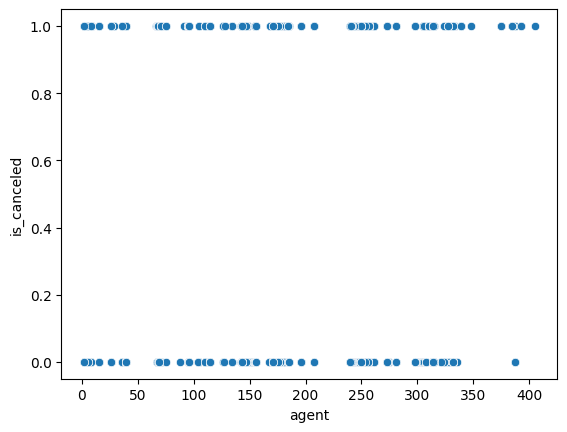

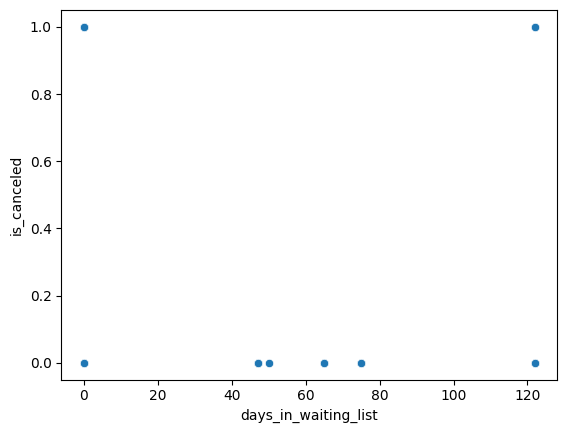

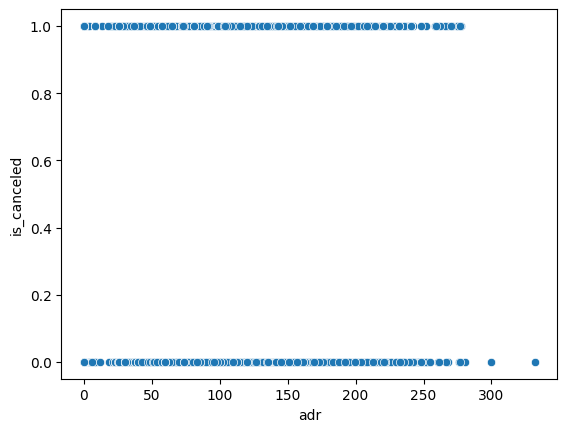

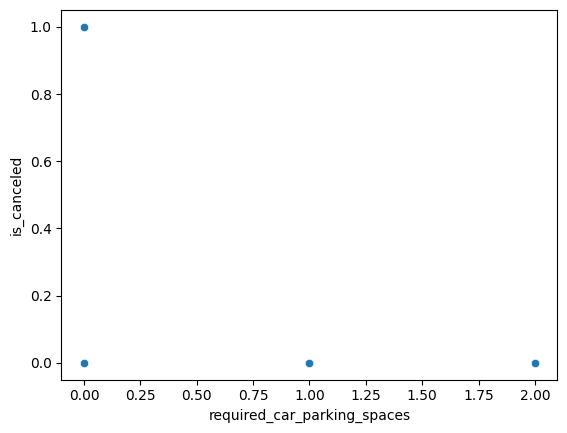

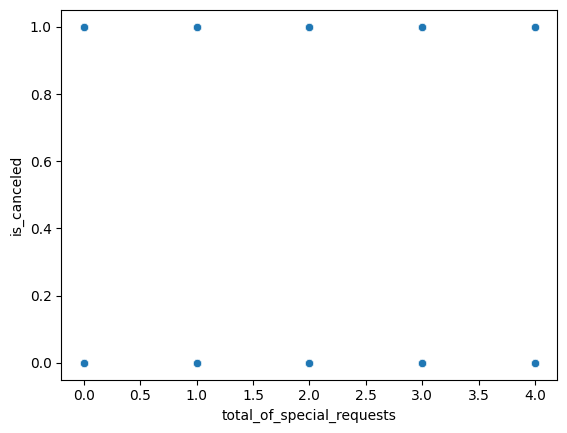

In [ ]:
for i in numeric_columns:
  sns.scatterplot(data=df, x=i,y = 'is_canceled')
  plt.show()

There is no scatter xy because this is a classification not a regression problem


<Axes: >

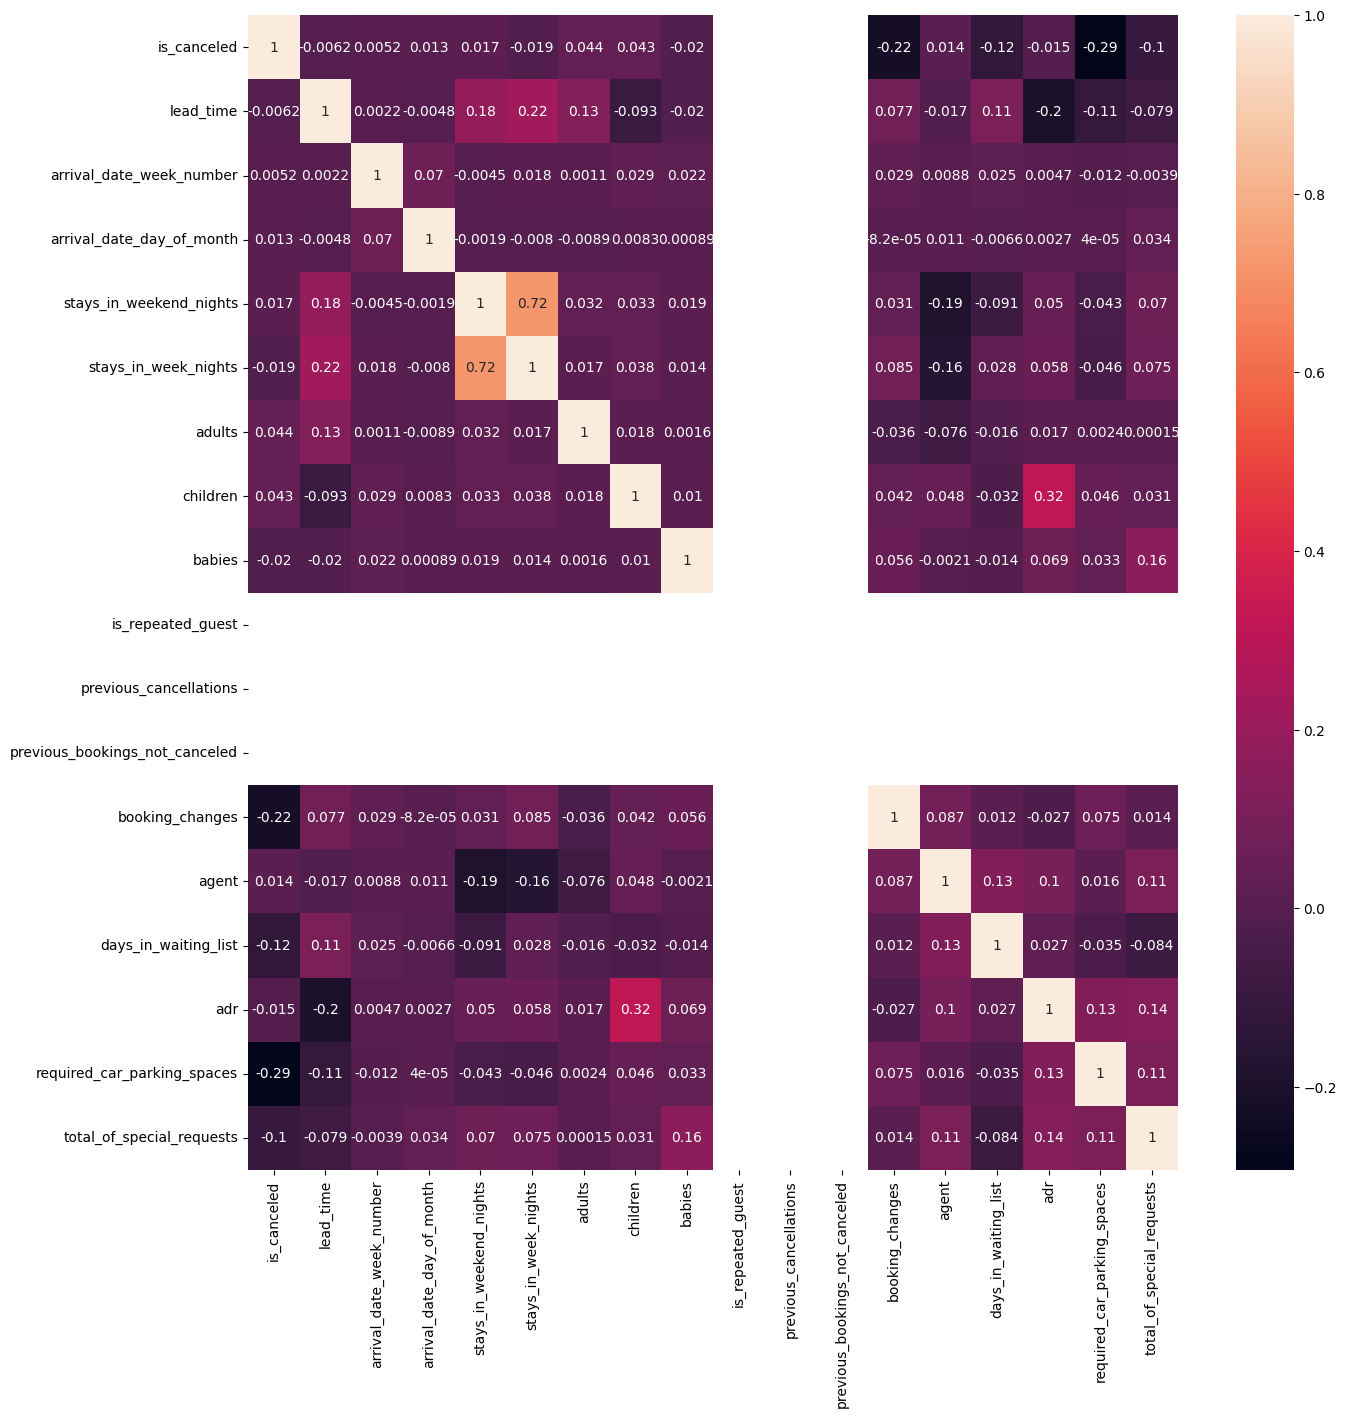

In [ ]:
s = df.select_dtypes(include ="number").corr()
plt.figure(figsize=(15,15))
sns.heatmap(s,annot = True)

There is no linear relationships regression ( because its a  classification problem )

In [ ]:
# we dont handle missing values on target values .If we do so this can lead to missleading results
#Becuase we never impute the target , as its what we are predicting
df = df.dropna(subset=['is_canceled'])

In [ ]:

(df.isnull().sum()/df.shape[0])*100
#Check for missing values

,0
hotel,0.000000
is_canceled,0.000000
lead_time,0.000000
arrival_date_month,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.000000
stays_in_week_nights,0.000000
adults,0.000000
children,0.000000


We look for the values that have nulls (in order to impute them)

In [ ]:
#imputing the numeric values wih the median
for col in ['children','agent']:
  if col in df.columns:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0


In [ ]:
#Replace non-numeric( string objects with nulls) with mode
for col in ['country','market_segment','distribution_channel']:
    if df[col].isnull().any(): # Check if the column has any null values
        df[col] = df[col].fillna(df[col].mode()[0])
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0


In [ ]:
#Use Knn model to remove the outlier based on the closest K neighbours
from sklearn.impute import KNNImputer
impute = KNNImputer()

In [ ]:
for i in df.select_dtypes(include = "number").columns:
  df[i] = impute.fit_transform(df[[i]])